Assign6: Logistic Regression
Due Date: Nov 1, before midnight

We will use a new dataset this time: Fashion MNIST. It has 60K images that are 28×28=78428×28=784 dimensional, and which belong to 10 classes. The data has already been converted into csv format, where the first column denotes the class, and the remaining 784 attributes are the pixel values (1-255). You will use the 60K examples fashion-mnist_train.csv file for training, and the 10K examples fashion-mnist_test.csv for testing.

Since the data is large, you should first set the random seed to 42, and then shuffle the points in the training and test sets. Select the first 10000 points after shuffling the train.csv file as the training data, and the first 5000 points after shuffling test.csv files as the testing data.

You will implement the multi-class logistic regression algorithm as described in Algorithm 24.2 (Chapter 24, page 634).

Your script should print out the weight vector(s), and also the final accuracy value on the test data (see Eq 22.2). You should also compute the F1-score (see Eq 22.7 in chapter 22).

You should use the scipy.special.softmax function rather than your own, since it is more robust.

CSCI6390: There may be an extra component which is TBD.

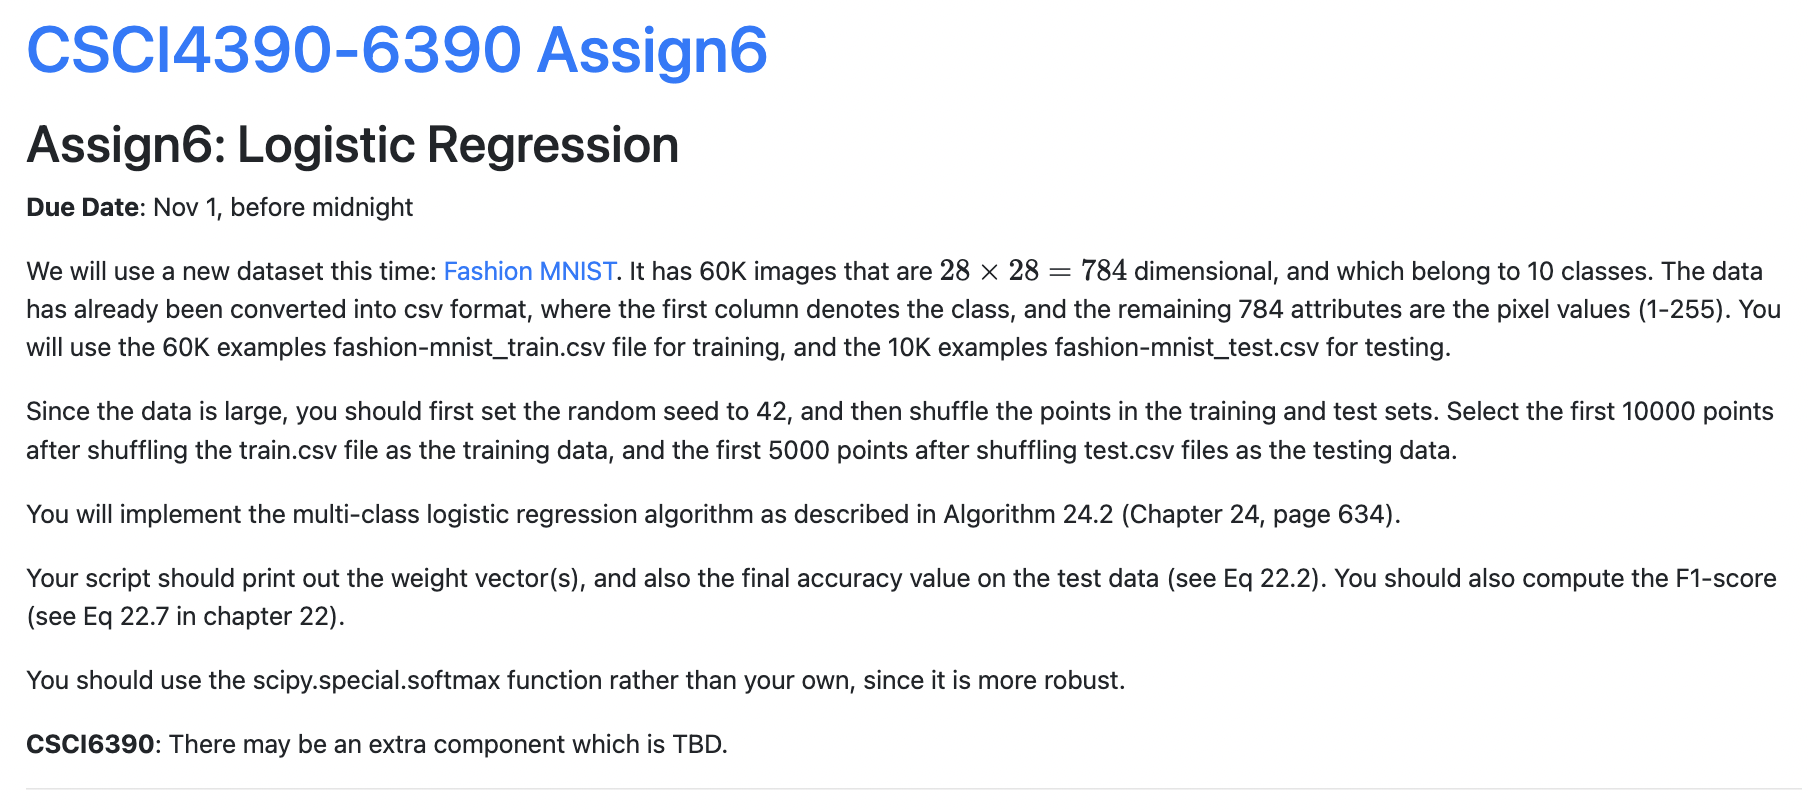

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

## Preprocessing

In [29]:
df_train = pd.read_csv('fashion-mnist_test.csv', delimiter=',')
df_test = pd.read_csv('fashion-mnist_test.csv', delimiter=',')

D = df_train.to_numpy()
D_test = df_test.to_numpy()

#shuffling
np.random.seed(42)
np.random.shuffle(D)
np.random.shuffle(D_test)

#seperating X from Y
X_train = D[:10000, 1:]
n,d = X_train.shape
X_test = D_test[:5000, 1:]
n_t,d_t = X_test.shape

#augmenting data with ones vector
X_train = np.hstack((np.ones([n,1]),X_train))
X_test = np.hstack((np.ones([n_t,1]),X_test))

#one hot encoding
Y_train = (pd.get_dummies(D[:10000,0])).to_numpy()
Y_test = (pd.get_dummies(D_test[:5000,0])).to_numpy()

## Multiple Logistic Regression

In [33]:
from scipy.special import softmax

def MLR(X,Y,eta,ep,max_itr):
    n,d = X.shape
    classes = Y.shape[1]
    t=0
    w = np.random.rand(Y.shape[1],d)
    
    diff = 1
    while t<max_itr and diff>ep:
        wp = w.copy()
        for i in np.random.permutation(n):
            pi = softmax(np.dot(w, X[i,:]))
            for j in range(classes):
                w_j = (Y[i,j] - pi[j]) * X[i,:]
                w[j,:] = w[j,:] + eta * w_j
        t += 1
        diff = np.linalg.norm(w-wp)
    return w
                         

## Weight Vector

In [68]:
wt = MLR(X_train, Y_train, 1e-6, 1e-4, 200)

In [67]:
print("weightvector :\n",pd.DataFrame(wt))

weightvector :
         0         1         2         3         4         5         6    \
0  0.916933  0.956088  0.526185  0.715619  0.508100  0.613259  0.292535   
1  0.105567  0.057863  0.357758  0.117622  0.427557  0.756165  0.823885   
2  0.427258  0.582216  0.204562  0.102145  0.358840  0.536039  0.544286   
3  0.267842  0.365907  0.029951  0.165067  0.712329  0.617487  0.955185   
4  0.362812  0.389207  0.148943  0.435959  0.307631  0.424446  0.388603   
5  0.200374  0.299061  0.079793  0.314252  0.821811  0.518303  0.117605   
6  0.575572  0.858671  0.678746  0.788897  0.206725  0.361616  0.847904   
7  0.737433  0.879357  0.317954  0.478869  0.627685  0.052652  0.615056   
8  0.501945  0.534437  0.609349  0.017105  0.210777  0.140785  0.905445   
9  0.126781  0.405920  0.745673  0.463197  0.705340  0.030466  0.146045   

        7         8         9    ...       775       776       777       778  \
0  0.111607  0.525812  0.451720  ...  0.200095  0.398225  0.445665  0.871328  

## Accuracy, Precission, Recall and F-Score

In [47]:
match = 0
y=D_test[:5000,0]
y_hat = np.zeros(Y_test.shape[0])
for i in range(n_t):
    pi = softmax(np.dot(wt, X_test[i,:]))
    max_prob = np.argmax(pi)
    y_hat[i] = max_prob
    if Y_test[i,max_prob] ==1:
        match +=1
acc = match/n_t

print('accuracy value', acc)

accuracy value 0.8282


In [51]:
from sklearn.metrics import f1_score
f1_score(y, y_hat, average=None)

array([0.77830637, 0.94965449, 0.69965478, 0.83776352, 0.75357143,
       0.9025641 , 0.5751921 , 0.90647482, 0.9408284 , 0.91149542])

In [65]:
f_score= np.zeros(len(set(y_hat)))
counts= np.zeros(len(set(y_hat)))
prec= np.zeros(len(set(y_hat)))
recall= np.zeros(len(set(y_hat)))

for i in range(10):
    count=0
    tp=0
    fp=0
    fn=0
    for j in range(n_t):
        count+=1
        if y_hat[j] == i and y[j] == i:
            tp+=1
            count+=1
        elif y_hat[j] != i and y[j] == i:
            fn+=1
        elif y_hat[j] == i and y[j] != i:
            fp+=1
            count+=1
    prec[i] = tp/(tp+fp)
    recall[i]= tp/(tp+fn)
    f_score[i]= 2 * (prec[i] * recall[i]) / (prec[i] + recall[i])
print("\nprecision: ",prec, "\n recall: ", recall, "\nf-score: ", f_score)
            
print("overall F-score: ", np.sum(f_score)/len(f_score))


precision:  [0.7630597  0.93945312 0.8150134  0.79478261 0.68174475 0.93023256
 0.6405868  0.92259414 0.92621359 0.87843137] 
 recall:  [0.79417476 0.96007984 0.61290323 0.88565891 0.84231537 0.87649402
 0.52191235 0.89090909 0.95591182 0.94714588] 
f-score:  [0.77830637 0.94965449 0.69965478 0.83776352 0.75357143 0.9025641
 0.5751921  0.90647482 0.9408284  0.91149542]
overall F-score:  0.8255505434221415
